<a href="https://colab.research.google.com/github/ishaan1234/hello-world/blob/main/Dog_Breed_Img_Classification_Practice_and_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Unzip the files

In [1]:
#!unzip "/content/drive/MyDrive/TensorFlow Practice/dog-breed-identification.zip" -d "/content/drive/MyDrive/TensorFlow Practice"

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [4]:
import tensorflow_hub as hub
print(hub.__version__)

#Checking for GPU
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "Not available")

0.13.0
GPU available


In [5]:
labels_csv=pd.read_csv("/content/drive/MyDrive/TensorFlow Practice/labels.csv")

In [6]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [7]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<Axes: >

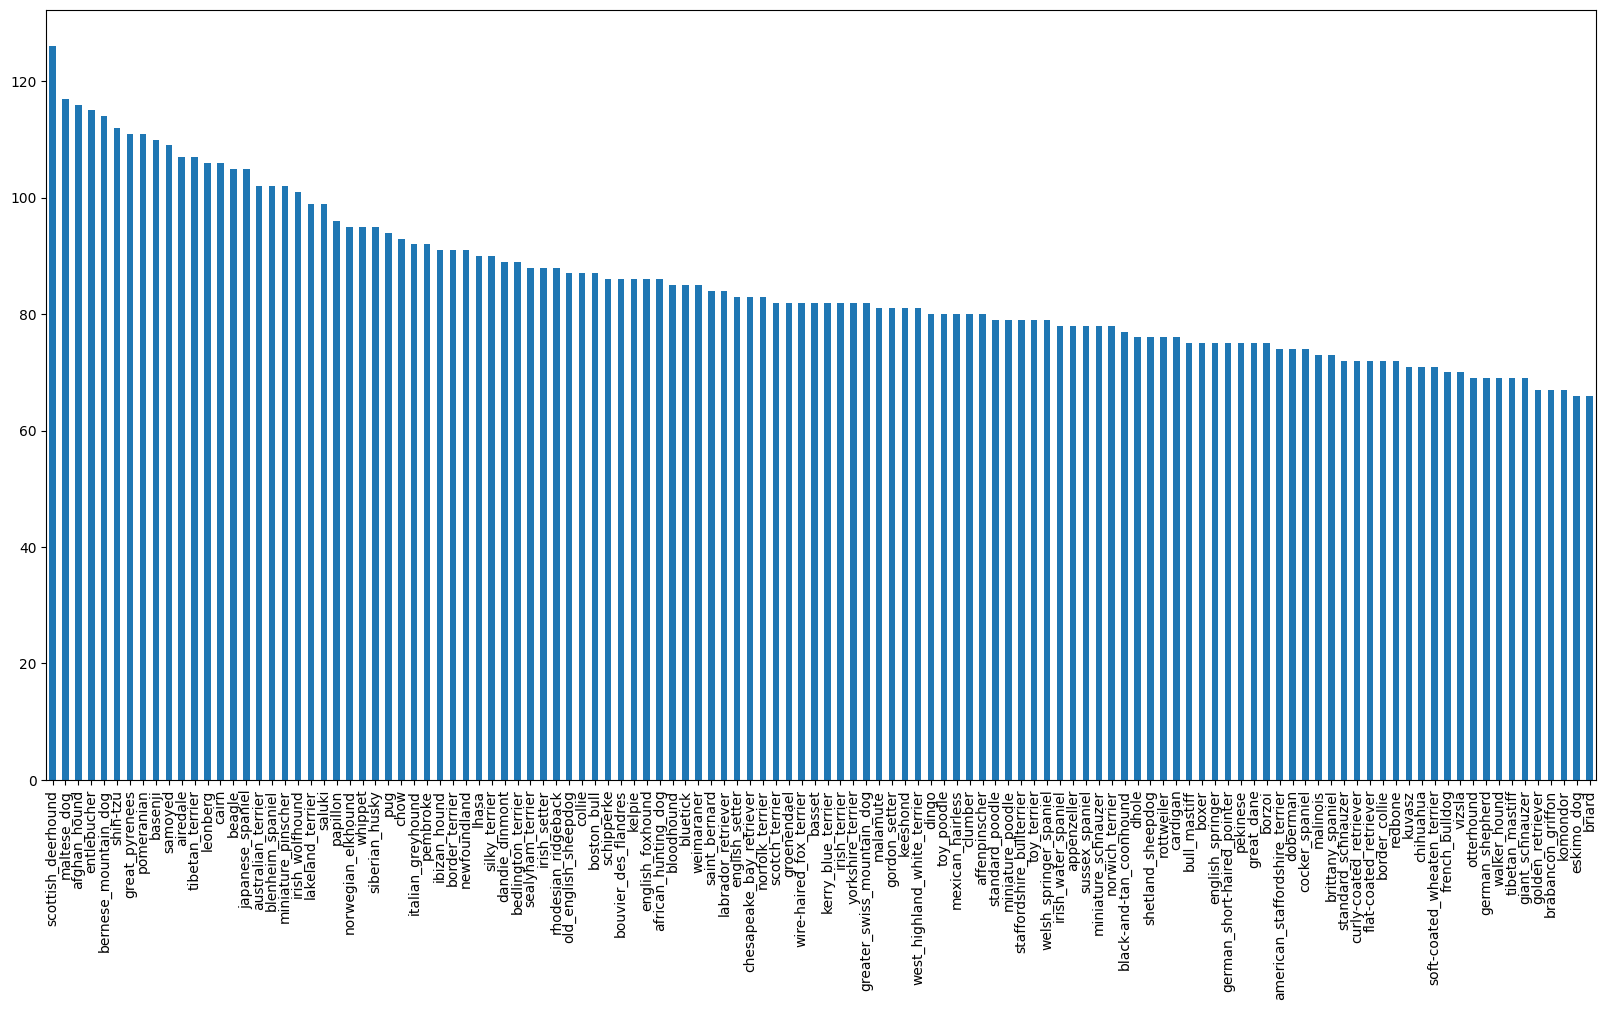

In [9]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [10]:
labels_csv["breed"].value_counts().median()

82.0

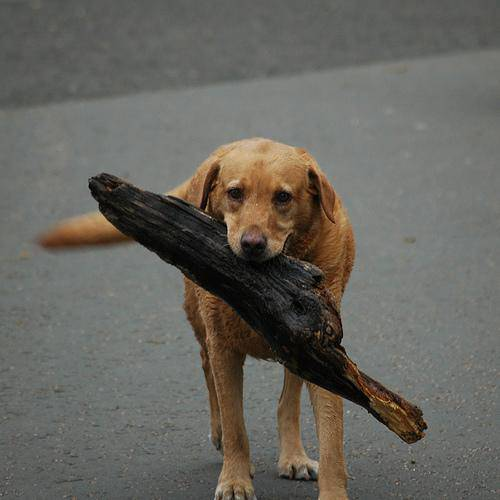

In [11]:
from IPython.display import Image
Image("/content/drive/MyDrive/TensorFlow Practice/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")

### Getting list of images and their labels

In [12]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
filenames=["/content/drive/MyDrive/TensorFlow Practice/train/"+fnames+".jpg" for fnames in labels_csv["id"]]

filenames[:10]

['/content/drive/MyDrive/TensorFlow Practice/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/TensorFlow Practice/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/TensorFlow Practice/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/TensorFlow Practice/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/TensorFlow Practice/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/TensorFlow Practice/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/TensorFlow Practice/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/TensorFlow Practice/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/TensorFlow Practice/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/TensorFlow Practice/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [14]:
import os
os.listdir("/content/drive/MyDrive/TensorFlow Practice/train/")[:10]

['e8d0712b9ca47f77b333858183a38ef7.jpg',
 'dd2026cafded2318431c3c78f5026fc9.jpg',
 'e795a13bbfa8a72daeb315646f83068a.jpg',
 'e6a382c2cca7aa606dda1d5f7109cddc.jpg',
 'dd0834325da4d5500f22614308e76d9f.jpg',
 'def67b643b92ee3d6cdec1128df0a9b6.jpg',
 'df8895a945ab874f4a9cdd451aebc011.jpg',
 'e8f36fbe544d5c3329bc9e51606abcef.jpg',
 'e00443152fb5951922730b21ba08f8f5.jpg',
 'e85f6d7af1405365c8e576d0a0aa7a2b.jpg']

In [15]:
if len(os.listdir("/content/drive/MyDrive/TensorFlow Practice/train/"))==len(filenames):
  print("Filenames match actual amount of files, you may proceed, little one")
else:
  print("You shall not pass, check the target directory as filenames do not match actual amount of files")

Filenames match actual amount of files, you may proceed, little one


In [16]:
print(labels_csv.breed[9002])


brabancon_griffon


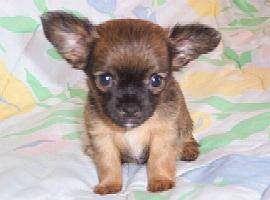

In [17]:
Image(filenames[9002])


### Lets now work with our labels

In [18]:
import numpy as np
labels=np.array(labels_csv["breed"])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [20]:
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
boolean_labels=[label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
# Example: Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating a validation set 

In [24]:
X = filenames
y= boolean_labels

In [25]:
len(X)

10222

We're going to start off experimenting 1000 images and increase as needed

In [26]:
#Set number of images for experimenting 
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000}

In [27]:
from sklearn.model_selection import train_test_split

#Split into training and validation
X_train, X_val, y_train, y_val=train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=0.2,
                                                random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [28]:
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/TensorFlow Practice/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/TensorFlow Practice/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/TensorFlow Practice/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/TensorFlow Practice/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/TensorFlow Practice/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fal

### Turning images to tensors

1. Take image filepath as input
2. Use TensorFlow to read file and save it to variable image
3. Turn image to tensors 
4. Resize the image to be (224,224)
5. Return the modified image

In [29]:
#Before we do, lets see what importing an image looks like
from matplotlib.pyplot import imread
image= imread(filenames[42])
image.shape

(257, 350, 3)

In [30]:
image.max(), image.min()

(255, 0)

In [31]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [32]:
#Lets start the real thing
IMG_SIZE=224

# Create a function for preprocessing images
def process_image(image_path, IMG_SIZE=IMG_SIZE):
  """
  Takes image path and returns the image as tensors
  """
  #Read in an image file 
  image= tf.io.read_file(image_path) #Bas file path store ho rha
  
  #Turn jpg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image=tf.io.decode_jpeg(image, channels=3) #Path ki image converted to Tensors
  
  # Convert the colour channel values from 0-255 to 0-1 values
  image= tf.image.convert_image_dtype(image, tf.float32)

  #Resize the image to (224,224)
  image=tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  
  return image 

In [33]:
def get_image_label(image_path, label):
  image=process_image(image_path)
  return image, label

In [34]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

## **Now** we have learned to convert it into tensors, divide all the 10k images to batches of 32 to convert it into tensors

In [35]:
BATCH_SIZE=32
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if its training but does not shuffle validation
  Also accepts test data as input (no labels)
  """
  
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    #Create image label tuples, also turns image path to preprocessed image
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    #Create image label tuples, also turns image path to preprocessed image
    data=data.map(get_image_label)

    data_batch=data.batch(BATCH_SIZE)
  return data_batch

In [36]:
train_data=create_data_batches(X_train, y_train)
val_data= create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [37]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [38]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

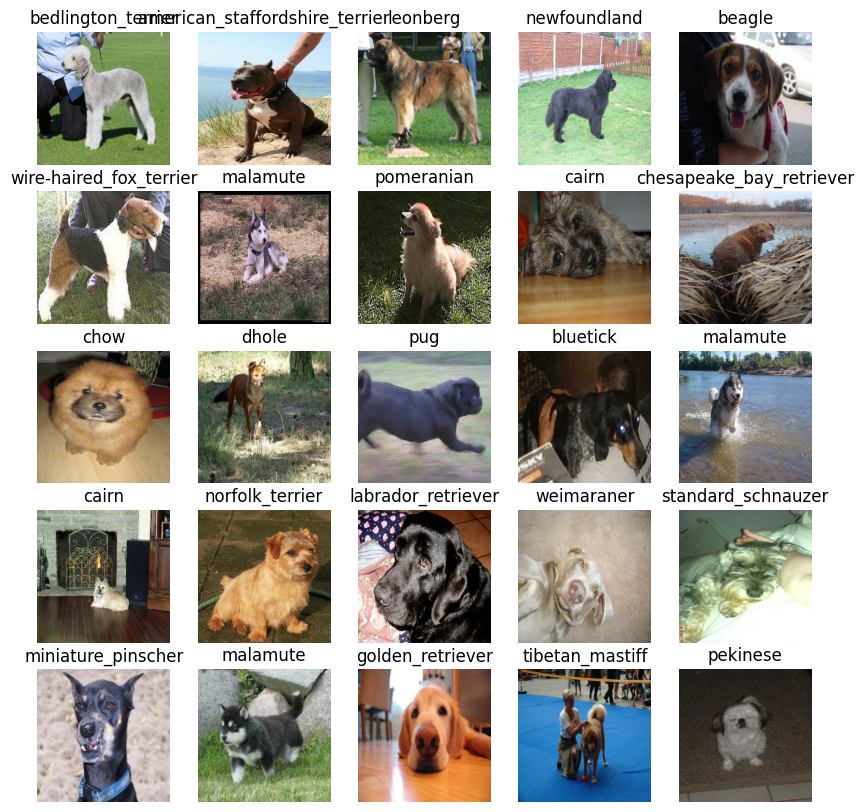

In [39]:
train_images, train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

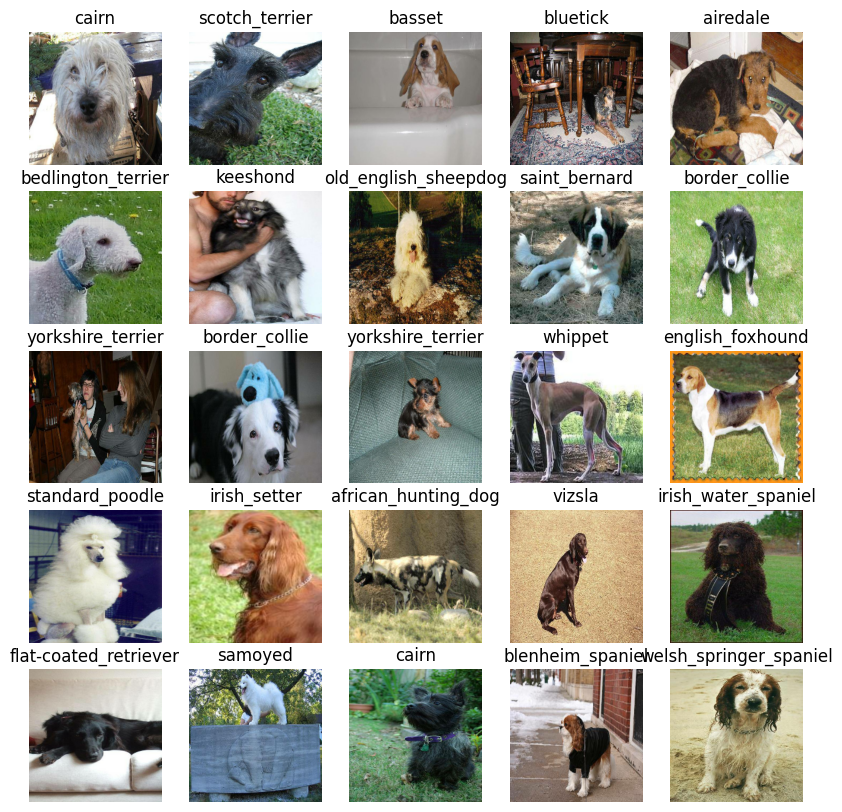

In [40]:
val_images, val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
Before we build it, there are a few things we need to define:
1. Input shape(our image shape) in form of tensors
2. Output shape(image labels) in form of tensors
3. The URL of our model we want to use

In [41]:
IMG_SIZE

224

In [ ]:
INPUT_SHAPE=[None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE= len(unique_breeds)
